# INF 552 Homework-6

### Mani Madhuri Manthina - 2464397943

Import needed libraries

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn import linear_model
from sklearn.svm import l1_min_c
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from datetime import datetime
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import random

from sklearn.cluster import SpectralClustering

In [3]:

df = pd.read_csv('wdbc.csv',header=None)
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")
#print(df)
#df_M = df[i for df.iloc[i,1]='M']


Number of rows in data = 569
Number of columns in data = 32


**Sample data:**


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#pd.DataFrame(df.loc[:,df.columns!=1])

In [6]:
#Normalized data
s = MinMaxScaler()
df_X = pd.DataFrame(df.loc[:,df.columns!=1])
df_y = pd.DataFrame(df.loc[:,df.columns==1])
#df_y=pd.DataFrame(np.where(df_y.loc[:,df.columns==0]=="M",0,1))
s.fit(df_X)
df_X_s=pd.DataFrame(s.transform(df_X))
df_N = pd.concat([df_X_s,df_y],axis=1,ignore_index='True')
df_N.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M


In [7]:
df_B = df_N.loc[df_N[31] != 'M']
df_M = df_N.loc[df_N[31] == 'M']
df_B.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
19,0.009329,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,...,0.192964,0.245480,0.129276,0.480948,0.145540,0.190895,0.442612,0.278336,0.115112,B
20,0.009329,0.288655,0.202908,0.289130,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,...,0.225746,0.227501,0.109443,0.396421,0.242852,0.150958,0.250275,0.319141,0.175718,B
21,0.009330,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,...,0.097015,0.073310,0.031877,0.404345,0.084903,0.070823,0.213986,0.174453,0.148826,B
37,0.000929,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,...,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618,B
46,0.094046,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,...,0.264925,0.034115,0.014009,0.386515,0.105180,0.054952,0.088110,0.303568,0.124951,B


In [8]:
X_train_B,X_test_B,y_train_B,y_test_B = train_test_split(df_B.loc[:,df_B.columns!=31],df_B.loc[:,df_B.columns==31], test_size=0.2, random_state=42)
X_train_M,X_test_M,y_train_M,y_test_M = train_test_split(df_M.loc[:,df_M.columns!=31],df_M.loc[:,df_M.columns==31], test_size=0.2, random_state=42)

In [9]:
X_train = X_train_B.append(X_train_M,ignore_index=True)
#print(len(X_train))
X_test = X_test_B.append(X_test_M,ignore_index=True)
#print(len(X_test))
y_test = y_test_B.append(y_test_M,ignore_index=True)
#print(len(y_test))
y_train = y_train_B.append(y_train_M,ignore_index=True)
#print(y_train)

#### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall, F-score, and AUC) that you obtain from each algorithm.


#### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.



  Supervised learning implemented on Train Set : AVG value for 30 iterations:

{'accuracy': 0.9843612334801765, 'precision': 0.9823012201219478, 'recall': 0.9929824561403506, 'fscore': 0.9876119028758094, 'auc': 0.9814024706737258}

  Supervised learning implemented on Test Set : AVG value for 30 iterations:

{'accuracy': 0.9605797101449273, 'precision': 0.9733685365008083, 'recall': 0.9634259259259257, 'fscore': 0.9683430297379952, 'auc': 0.9596199397071492}

Confusion Matrix for train data:
 [[164   5]
 [  2 283]]

Area under curve for train data: 0.9816983286618913


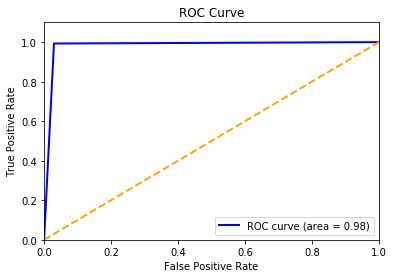


Confusion Matrix for Test data:
 [[41  2]
 [ 2 70]]

Area under curve for test data: 0.9628552971576227


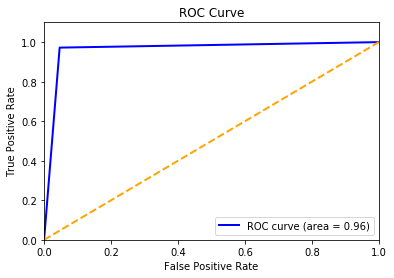

In [10]:
#ref:https://github.com/sayali-nakashe/Breast-Cancer-Analysis/blob/master/Supervised%2C%20Semi-Supervised%2C%20and%20Unsupervised%20Learning%20on%20the%20Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set.ipynb
supervised_train = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
supervised_test = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
svm_train={p:[] for p in ['accuracy','precision','recall','fscore','auc']}
svm_test={p:[] for p in ['accuracy','precision','recall','fscore','auc']}


for i in range(1,31):
    
    
    X_train_B,X_test_B,y_train_B,y_test_B = train_test_split(df_B.loc[:,df_B.columns!=31],df_B.loc[:,df_B.columns==31], test_size=0.2, random_state=42)
    X_train_M,X_test_M,y_train_M,y_test_M = train_test_split(df_M.loc[:,df_M.columns!=31],df_M.loc[:,df_M.columns==31], test_size=0.2, random_state=42)
    X_train = X_train_B.append(X_train_M,ignore_index=True)
    X_test = X_test_B.append(X_test_M,ignore_index=True)
    y_test = y_test_B.append(y_test_M,ignore_index=True)
    y_train = y_train_B.append(y_train_M,ignore_index=True)
    
    penality_total=[]
    
    
    
    C_range_l1 = np.logspace(-3,6,10)
    param_grid = dict( C=C_range_l1)
    svm_l1 = LinearSVC( max_iter=1000, penalty='l1',dual=False)
    clf_l1 = GridSearchCV(svm_l1,param_grid, cv=2)
    clf_l1.fit(X_train, y_train)
    y_pred_l1_svc =clf_l1.predict(X_test)
    #print(y_train)

    
    penality_total.append(clf_l1.best_params_['C'])
    
    
        
    train_superv = pd.DataFrame()
    train_superv = pd.concat([pd.DataFrame(y_train),pd.DataFrame(clf_l1.predict(X_train))],axis=1,ignore_index=True)
    train_superv=pd.DataFrame(np.where(train_superv.loc[:,:]=="M",0,1))
    train_superv.columns=['y_true','y_pred']
    #print(train_superv)

    test_superv = pd.DataFrame()
    test_superv = pd.concat([pd.DataFrame(y_test),pd.DataFrame(clf_l1.predict(X_test))],axis=1,ignore_index=True)
    test_superv=pd.DataFrame(np.where(test_superv.loc[:,:]=="M",0,1))
    test_superv.columns=['y_true','y_pred']
    #print(test_superv)

    
    

  

    
    svm_train['accuracy'].append(clf_l1.score(X_train,y_train))
    svm_test['accuracy'].append(clf_l1.score(X_test,y_test))

    
    svm_train['precision'].append(precision_score(train_superv["y_true"],train_superv["y_pred"]))
    svm_test['precision'].append(precision_score(test_superv["y_true"],test_superv["y_pred"]))
    #precision_score(test_superv['y_true'],test_superv['y_pred'])
    #print(test_superv['y_true'])

    
    svm_train['recall'].append(recall_score(train_superv["y_true"],train_superv["y_pred"]))
    svm_test['recall'].append(recall_score(test_superv["y_true"],test_superv["y_pred"]))

    
    svm_train['fscore'].append(f1_score(train_superv["y_true"],train_superv["y_pred"]))
    svm_test['fscore'].append(f1_score(test_superv["y_true"],test_superv["y_pred"]))

    
    fpr, tpr, _ = roc_curve(train_superv["y_true"],train_superv["y_pred"])
    area_uc = auc(fpr, tpr)
    svm_train['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(test_superv["y_true"],test_superv["y_pred"])
    area_uc = auc(fpr, tpr)
    svm_test['auc'].append(auc(fpr, tpr))

    
    supervised_train['accuracy']=np.mean(svm_train['accuracy'])
    supervised_train['precision']=np.mean(svm_train['precision'])
    supervised_train['recall']=np.mean(svm_train['recall'])
    supervised_train['fscore']=np.mean(svm_train['fscore'])
    supervised_train['auc']=np.mean(svm_train['auc'])
    
     
    supervised_test['accuracy']=np.mean(svm_test['accuracy'])
    supervised_test['precision']=np.mean(svm_test['precision'])
    supervised_test['recall']=np.mean(svm_test['recall'])
    supervised_test['fscore']=np.mean(svm_test['fscore'])
    supervised_test['auc']=np.mean(svm_test['auc'])
    
print("\n  Supervised learning implemented on Train Set : AVG value for 30 iterations:\n")
print(supervised_train)

print("\n  Supervised learning implemented on Test Set : AVG value for 30 iterations:\n")
print(supervised_test)


cm = metrics.confusion_matrix(train_superv["y_true"],train_superv["y_pred"])
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(train_superv["y_true"],train_superv["y_pred"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()


cm = metrics.confusion_matrix(test_superv["y_true"],test_superv["y_pred"])
print("\nConfusion Matrix for Test data:\n",cm)
fpr, tpr, _ = roc_curve(test_superv["y_true"],test_superv["y_pred"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)

plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs


  Semi-supervised learning implemented on Train Set : AVG value for 30 iterations:

{'accuracy': 0.9836988304093566, 'precision': 0.981039853658943, 'recall': 0.9932400932400933, 'fscore': 0.9870926951271939, 'auc': 0.9804435760318112}

 Semi-supervised learning implemented on Test Set : AVG value for 30 iterations:

{'accuracy': 0.9710914454277286, 'precision': 0.9688540399036304, 'recall': 0.9863849765258216, 'fscore': 0.9773466668948458, 'auc': 0.9658115358819584}

Confusion Matrix for train data:
 [[170   0]
 [  0 286]]

Area under curve for train data: 1.0


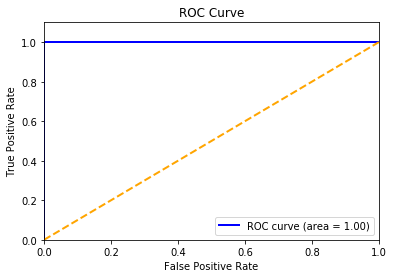


Confusion Matrix for Test data:
 [[35  7]
 [ 2 69]]

Area under curve for test data: 0.9025821596244132


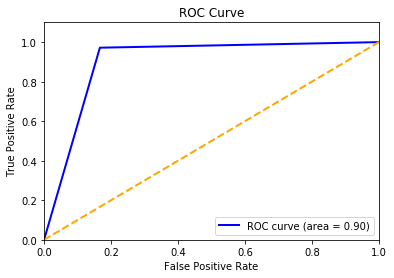

In [46]:
#ref #ref:https://github.com/sayali-nakashe/Breast-Cancer-Analysis/blob/master/Supervised%2C%20Semi-Supervised%2C%20and%20Unsupervised%20Learning%20on%20the%20Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set.ipynb
df_semi = pd.read_csv("wdbc.csv",header=None)
cols=["ID","Diagnosis","Attr_1","Attr_2","Attr_3","Attr_4","Attr_5","Attr_6","Attr_7","Attr_8","Attr_9","Attr_10","Attr_11","Attr_12","Attr_13","Attr_14","Attr_15","Attr_16","Attr_17","Attr_18","Attr_19","Attr_20","Attr_21","Attr_22","Attr_23","Attr_24","Attr_25","Attr_26","Attr_27","Attr_28","Attr_29","Attr_30"]
df_semi.columns = cols
df_semi=df_semi.drop("ID",axis=1)
X = pd.DataFrame()
X = df_semi.drop(["Diagnosis"],axis=1)
Y=np.where(df_semi["Diagnosis"]=="M",0,1)
Y=pd.DataFrame(Y)
Y.columns=["Diagnosis"]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
semi_norm=pd.concat([X,Y],axis=1)

X_positive = semi_norm[semi_norm["Diagnosis"]==1]
X_negative = semi_norm[semi_norm["Diagnosis"]==0]

semi_fin_train = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
semi_fin_test = {p:None for p in ['accuracy','precision','recall','fscore','auc']}


svc_train={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

svc_test={p:[] for p in ['accuracy','precision','recall','fscore','auc']}


for i in range(1,31):
    
    
    
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=semi_norm.drop(index=X_test.index.tolist())

    y_train=X_train["Diagnosis"]
    y_test=X_test["Diagnosis"]
    
    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)
    
    best_penalty=[]
    
    
    
    params = {'C':[0.1,1,10,100,1000]}
    l_svc = LinearSVC(penalty='l1', dual = False, max_iter=1000000)
    semi_cls = GridSearchCV(l_svc, params, cv=5)
    semi_cls.fit(X_train,y_train)
    
    
    best_penalty.append(semi_cls.best_params_['C'])
    
    
    
    supervised_train_results = pd.DataFrame()
    supervised_train_results["True_y"] = y_train
    supervised_train_results["Pred_y"] = semi_cls.predict(X_train)

    semi_tst = pd.DataFrame()
    semi_tst["True_y"] = y_test
    semi_tst["Pred_y"] = semi_cls.predict(X_test)

    

    
    svc_train['accuracy'].append(semi_cls.score(X_train,y_train))
    svc_test['accuracy'].append(semi_cls.score(X_test,y_test))

    
    svc_train['precision'].append(precision_score(supervised_train_results["True_y"],supervised_train_results["Pred_y"]))
    svc_test['precision'].append(precision_score(semi_tst["True_y"],semi_tst["Pred_y"]))

    
    svc_train['recall'].append(recall_score(supervised_train_results["True_y"],supervised_train_results["Pred_y"]))
    svc_test['recall'].append(recall_score(semi_tst["True_y"],semi_tst["Pred_y"]))

    
    svc_train['fscore'].append(f1_score(supervised_train_results["True_y"],supervised_train_results["Pred_y"]))
    svc_test['fscore'].append(f1_score(semi_tst["True_y"],semi_tst["Pred_y"]))

    
    fpr, tpr, _ = roc_curve(supervised_train_results["True_y"],supervised_train_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    svc_train['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(semi_tst["True_y"],semi_tst["Pred_y"])
    area_uc = auc(fpr, tpr)
    svc_test['auc'].append(auc(fpr, tpr))

    
    semi_fin_train['accuracy']=np.mean(svc_train['accuracy'])
    semi_fin_train['precision']=np.mean(svc_train['precision'])
    semi_fin_train['recall']=np.mean(svc_train['recall'])
    semi_fin_train['fscore']=np.mean(svc_train['fscore'])
    semi_fin_train['auc']=np.mean(svc_train['auc'])
    
     
    semi_fin_test['accuracy']=np.mean(svc_test['accuracy'])
    semi_fin_test['precision']=np.mean(svc_test['precision'])
    semi_fin_test['recall']=np.mean(svc_test['recall'])
    semi_fin_test['fscore']=np.mean(svc_test['fscore'])
    semi_fin_test['auc']=np.mean(svc_test['auc'])
    
print("\n  Semi-supervised learning implemented on Train Set : AVG value for 30 iterations:\n")
print(semi_fin_train)

print("\n Semi-supervised learning implemented on Test Set : AVG value for 30 iterations:\n")
print(semi_fin_test)


cm_semi = metrics.confusion_matrix(supervised_train_results["True_y"],supervised_train_results["Pred_y"])
print("\nConfusion Matrix for train data:\n",cm_semi)
fpr, tpr, _ = roc_curve(supervised_train_results["True_y"],supervised_train_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

cm_semi = metrics.confusion_matrix(semi_tst["True_y"],semi_tst["Pred_y"])
print("\nConfusion Matrix for Test data:\n",cm_semi)
fpr, tpr, _ = roc_curve(semi_tst["True_y"],semi_tst["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)

plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

##### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

##### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

###### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.


 Unsupervised learning implemented on Train Set : AVG value for 30 iterations:

{'accuracy': 0.9262426900584798, 'precision': 0.9132176403446889, 'recall': 0.9751748251748253, 'fscore': 0.9431337597366254, 'auc': 0.9095481969011381}

 Unsupervised learning implemented on Test Set : AVG value for 30 iterations:

{'accuracy': 0.4147492625368731, 'precision': 0.39790762437402627, 'recall': 0.40938967136150234, 'fscore': 0.4010144809312506, 'auc': 0.41659959758551307}

Confusion Matrix for train data:
 [[145  25]
 [ 10 276]]

Area under curve for train data: 0.9089880707527765


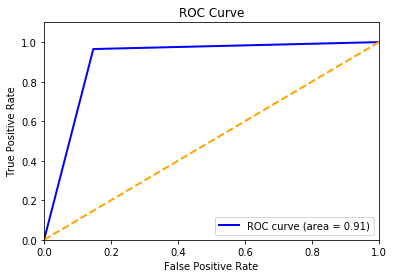


Confusion Matrix for test data:
 [[ 7 35]
 [70  1]]

Area under curve for test data: 0.09037558685446008


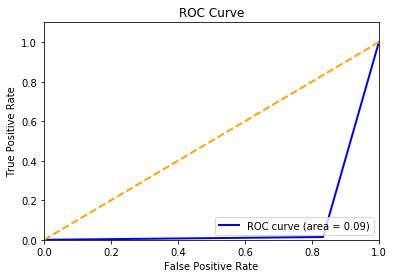

In [48]:
#ref #ref:https://github.com/sayali-nakashe/Breast-Cancer-Analysis/blob/master/Supervised%2C%20Semi-Supervised%2C%20and%20Unsupervised%20Learning%20on%20the%20Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set.ipynb
dataset = pd.read_csv("wdbc.csv",header=None)
cols=["ID","Diagnosis","Attr_1","Attr_2","Attr_3","Attr_4","Attr_5","Attr_6","Attr_7","Attr_8","Attr_9","Attr_10","Attr_11","Attr_12","Attr_13","Attr_14","Attr_15","Attr_16","Attr_17","Attr_18","Attr_19","Attr_20","Attr_21","Attr_22","Attr_23","Attr_24","Attr_25","Attr_26","Attr_27","Attr_28","Attr_29","Attr_30"]
dataset.columns = cols
dataset=dataset.drop("ID",axis=1)
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X = pd.DataFrame()
X = dataset.drop(["Diagnosis"],axis=1)
Y=np.where(dataset["Diagnosis"]=="M",0,1)
Y=pd.DataFrame(Y)
Y.columns=["Diagnosis"]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
normalized_data=pd.concat([X,Y],axis=1)
X_positive = normalized_data[normalized_data["Diagnosis"]==1]
X_negative = normalized_data[normalized_data["Diagnosis"]==0]
X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
X_train=normalized_data.drop(index=X_test.index.tolist())
y_test=X_test["Diagnosis"]
y_train=X_train["Diagnosis"]
X_test = X_test.drop(["Diagnosis"],axis=1)
X_train = X_train.drop(["Diagnosis"],axis=1)
final_unsupervised_train_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_unsupervised_test_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
unsupr_train_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}
unsupr_test_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}
for i in range(1,31):
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=normalized_data.drop(index=X_test.index.tolist())
    y_test=X_test["Diagnosis"]
    y_train=X_train["Diagnosis"]
    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)
    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)
    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    k_means = KMeans(n_clusters=2,init='k-means++',random_state=random.randint(20,200),n_init=20).fit(X_train)
    
    clus_dist= k_means.transform(X_train)
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(k_means.cluster_centers_)
   
    clus_0=y_train.loc[indices[0]]
    clus_1=y_train.loc[indices[1]]
    maj_poll_clus_0=clus_0.value_counts()
    maj_poll_clus_1=clus_1.value_counts()
    pred_labels= k_means.labels_
    pred_labels= pd.DataFrame(pred_labels)
    pred_labels_0=pred_labels[pred_labels[0]==0]
    pred_labels_1=pred_labels[pred_labels[0]==1]
    max_index_0=np.argmax(maj_poll_clus_0)
    max_index_1=np.argmax(maj_poll_clus_1)
    pred_labels_0['class']=max_index_0
    pred_labels_1['class']=max_index_1
    final_pred_y=pd.concat([pred_labels_0['class'],pred_labels_1['class']],axis=0)
    final_pred_y=final_pred_y.sort_index()
    unsupervised_test_results = pd.DataFrame()
    unsupervised_test_results["True_y"] = y_test
    unsupervised_test_results["Pred_y"] = k_means.predict(X_test)
   
    unsupr_train_results['accuracy'].append(accuracy_score(y_train,final_pred_y))
    unsupr_test_results['accuracy'].append(accuracy_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))
    unsupr_train_results['precision'].append(precision_score(y_train,final_pred_y))
    unsupr_test_results['precision'].append(precision_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))
    
    unsupr_train_results['recall'].append(recall_score(y_train,final_pred_y))
    unsupr_test_results['recall'].append(recall_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))

    
    unsupr_train_results['fscore'].append(f1_score(y_train,final_pred_y))
    unsupr_test_results['fscore'].append(f1_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))

    fpr, tpr, _ = roc_curve(y_train,final_pred_y)
    area_uc = auc(fpr, tpr)
    unsupr_train_results['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    unsupr_test_results['auc'].append(auc(fpr, tpr))

    
    final_unsupervised_train_results['accuracy']=np.mean(unsupr_train_results['accuracy'])
    final_unsupervised_train_results['precision']=np.mean(unsupr_train_results['precision'])
    final_unsupervised_train_results['recall']=np.mean(unsupr_train_results['recall'])
    final_unsupervised_train_results['fscore']=np.mean(unsupr_train_results['fscore'])
    final_unsupervised_train_results['auc']=np.mean(unsupr_train_results['auc'])
    
     
    final_unsupervised_test_results['accuracy']=np.mean(unsupr_test_results['accuracy'])
    final_unsupervised_test_results['precision']=np.mean(unsupr_test_results['precision'])
    final_unsupervised_test_results['recall']=np.mean(unsupr_test_results['recall'])
    final_unsupervised_test_results['fscore']=np.mean(unsupr_test_results['fscore'])
    final_unsupervised_test_results['auc']=np.mean(unsupr_test_results['auc'])
    
print("\n Unsupervised learning implemented on Train Set : AVG value for 30 iterations:\n")
print(final_unsupervised_train_results)

print("\n Unsupervised learning implemented on Test Set : AVG value for 30 iterations:\n")
print(final_unsupervised_test_results)


cm = metrics.confusion_matrix(y_train,final_pred_y)
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(y_train,final_pred_y)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

cm = metrics.confusion_matrix(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"])
print("\nConfusion Matrix for test data:\n",cm)
fpr, tpr, _ = roc_curve(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

##### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma that the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

##### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.


 Average Score over 30 Runs for Train set:

{'accuracy': 0.5494152046783626, 'precision': 0.633202586360876, 'recall': 0.5904428904428904, 'fscore': 0.6013739359078856, 'auc': 0.5354175236528177}

 Average Score over 30 Runs for Test set:

{'accuracy': 0.32595870206489674, 'precision': 0.22473190655478062, 'recall': 0.268075117370892, 'fscore': 0.24262853809534418, 'auc': 0.34594232059020785}

Confusion Matrix for train data:
 [[ 69 101]
 [ 86 200]]

Area under curve for train data: 0.5525915261209379


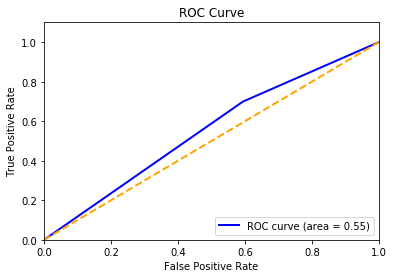


Confusion Matrix for test data:
 [[27 15]
 [71  0]]

Area under curve for test data: 0.3214285714285714


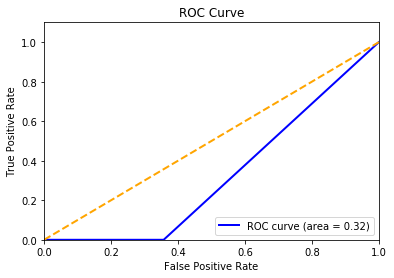

In [50]:
#ref:#ref:https://github.com/sayali-nakashe/Breast-Cancer-Analysis/blob/master/Supervised%2C%20Semi-Supervised%2C%20and%20Unsupervised%20Learning%20on%20the%20Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set.ipynb
spectral_df = pd.read_csv("wdbc.csv",header=None)
cols=["ID","Diagnosis","Attr_1","Attr_2","Attr_3","Attr_4","Attr_5","Attr_6","Attr_7","Attr_8","Attr_9","Attr_10","Attr_11","Attr_12","Attr_13","Attr_14","Attr_15","Attr_16","Attr_17","Attr_18","Attr_19","Attr_20","Attr_21","Attr_22","Attr_23","Attr_24","Attr_25","Attr_26","Attr_27","Attr_28","Attr_29","Attr_30"]
spectral_df.columns = cols
spectral_df=spectral_df.drop("ID",axis=1)
X = pd.DataFrame()
X = spectral_df.drop(["Diagnosis"],axis=1)
Y=np.where(spectral_df["Diagnosis"]=="M",0,1)
Y=pd.DataFrame(Y)
Y.columns=["Diagnosis"]
s = MinMaxScaler()
s.fit(X)
X=s.transform(X)
X=pd.DataFrame(X)
normalized_data=pd.concat([X,Y],axis=1)
X_positive = normalized_data[normalized_data["Diagnosis"]==1]
X_negative = normalized_data[normalized_data["Diagnosis"]==0]
X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
X_train=normalized_data.drop(index=X_test.index.tolist())
y_test=X_test["Diagnosis"]
y_train=X_train["Diagnosis"]

X_test = X_test.drop(["Diagnosis"],axis=1)
X_train = X_train.drop(["Diagnosis"],axis=1)

spec_fin_train = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
spec_fin_test = {p:None for p in ['accuracy','precision','recall','fscore','auc']}


spectr_train_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

spectr_test_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

for i in range(1,31):
    
    
    
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=normalized_data.drop(index=X_test.index.tolist())

    y_test=X_test["Diagnosis"]
    y_train=X_train["Diagnosis"]

    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)

    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    
    sp_clus=SpectralClustering(n_clusters=2,affinity='rbf',n_init=20,random_state=random.randint(20,200)).fit(X_train)
    sp_clus_labels=pd.DataFrame(sp_clus.labels_)
 
    spectral_clust_label_0=sp_clus_labels[sp_clus_labels[0]==0].index
    spectral_clust_label_1=sp_clus_labels[sp_clus_labels[0]==1].index
    
    sp_clus_0=X_train.iloc[spectral_clust_label_0,:]
    sp_clus_1=X_train.iloc[spectral_clust_label_1,:]
    
    center_0=sp_clus_0.mean(axis=0)
    center_1=sp_clus_1.mean(axis=0)
    
    centers=pd.DataFrame()
    centers[0]=center_0
    centers[1]=center_1
    

    
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(centers.T)
    

    
    sp_clus_0=y_train.loc[indices[0]]
    sp_clus_1=y_train.loc[indices[1]]


    
    maj_poll_clus_0=sp_clus_0.value_counts()
    maj_poll_clus_1=sp_clus_1.value_counts()

    
    spec_lab_p= k_means.labels_
    spec_lab_p= pd.DataFrame(spec_lab_p)

    spec_lab_p_0=spec_lab_p[spec_lab_p[0]==0]
    spec_lab_p_1=spec_lab_p[spec_lab_p[0]==1]

    

    max_index_spec_0=np.argmax(maj_poll_clus_0)
    max_index_spec_1=np.argmax(maj_poll_clus_1)
    spec_lab_p_0['class']=max_index_spec_0
    spec_lab_p_1['class']=max_index_spec_1
    final_pred_spec_y=pd.concat([spec_lab_p_0['class'],spec_lab_p_1['class']],axis=0)
    final_pred_spec_y=final_pred_spec_y.sort_index()

    
    
    spectral_test_results = pd.DataFrame()
    spectral_test_results["True_y"] = y_test
    spectral_test_results["Pred_y"] = sp_clus.fit_predict(X_test)


    

    
    spectr_train_results['accuracy'].append(accuracy_score(y_train,final_pred_spec_y))
    spectr_test_results['accuracy'].append(accuracy_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    
    spectr_train_results['precision'].append(precision_score(y_train,final_pred_spec_y))
    spectr_test_results['precision'].append(precision_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    
    spectr_train_results['recall'].append(recall_score(y_train,final_pred_spec_y))
    spectr_test_results['recall'].append(recall_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    
    spectr_train_results['fscore'].append(f1_score(y_train,final_pred_spec_y))
    spectr_test_results['fscore'].append(f1_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    
    fpr, tpr, _ = roc_curve(y_train,final_pred_spec_y)
    area_uc = auc(fpr, tpr)
    spectr_train_results['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(spectral_test_results["True_y"],spectral_test_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    spectr_test_results['auc'].append(auc(fpr, tpr))

    
    spec_fin_train['accuracy']=np.mean(spectr_train_results['accuracy'])
    spec_fin_train['precision']=np.mean(spectr_train_results['precision'])
    spec_fin_train['recall']=np.mean(spectr_train_results['recall'])
    spec_fin_train['fscore']=np.mean(spectr_train_results['fscore'])
    spec_fin_train['auc']=np.mean(spectr_train_results['auc'])
    
     
    spec_fin_test['accuracy']=np.mean(spectr_test_results['accuracy'])
    spec_fin_test['precision']=np.mean(spectr_test_results['precision'])
    spec_fin_test['recall']=np.mean(spectr_test_results['recall'])
    spec_fin_test['fscore']=np.mean(spectr_test_results['fscore'])
    spec_fin_test['auc']=np.mean(spectr_test_results['auc'])
    
print("\n Average Score over 30 Runs for Train set:\n")
print(spec_fin_train)

print("\n Average Score over 30 Runs for Test set:\n")
print(spec_fin_test)


cm_spec = metrics.confusion_matrix(y_train,final_pred_spec_y)
print("\nConfusion Matrix for train data:\n",cm_spec)
fpr, tpr, _ = roc_curve(y_train,final_pred_spec_y)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()




cm_spec = metrics.confusion_matrix(spectral_test_results["True_y"],spectral_test_results["Pred_y"])
print("\nConfusion Matrix for test data:\n",cm_spec)
fpr, tpr, _ = roc_curve(spectral_test_results["True_y"],spectral_test_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

## 2. Active Learning Using Support Vector Machines

#### (a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [52]:
banknote = pd.read_csv("data_banknote_authentication.txt",names=["variance","skewness","curtosis","entropy","class"])
testing_dataframe = banknote.sample(n=472)
training_dataframe = banknote.loc[~banknote.index.isin(testing_dataframe.index)]


#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [60]:
#ref https://github.com/ashwinigiri/Classification-using-SVM---Banknote-Authentication-and-MFCCs-dataset-UCI-repository-/blob/master/SVM.ipynb
svc_cls = LinearSVC(penalty='l1',dual=False)
penalty_parameter = {'C':[1,10]}
kf_10 = KFold(n_splits=10)
cross_val = GridSearchCV(svc_cls,penalty_parameter,cv=kf_10)
average_error = np.zeros(90)
for n in range(0,50):
    temporary_dataframe = pd.DataFrame()
    concatinated_dataframe=[]
    copied_dataframe = training_dataframe
    error_array=[]
    for i in range(0,90):
        tempdf = copied_dataframe.sample(n=10)
        temporary_dataframe = pd.concat([temporary_dataframe,tempdf])
        concatinated_dataframe.append(temporary_dataframe)
        copied_dataframe = copied_dataframe.loc[~copied_dataframe.index.isin(tempdf.index)]
        x_train=temporary_dataframe.loc[:,:'entropy']
        y_train=temporary_dataframe['class']
        cross_val.fit(x_train,y_train)
        x_test = testing_dataframe.loc[:,:'entropy']
        y_test = testing_dataframe['class']
        accuracy_score = cross_val.score(x_test,y_test)
        error = 1-accuracy_score
        error_array.append(error)
        average_error[i]+=error

In [67]:
#average_error

In [61]:
print("average errors for passive learning {}".format(average_error))

average errors for passive learning [0.39618644 0.27754237 0.10169492 0.11016949 0.05932203 0.05932203
 0.0720339  0.05932203 0.05720339 0.05720339 0.06355932 0.06567797
 0.05508475 0.06144068 0.04237288 0.03813559 0.03177966 0.03389831
 0.04237288 0.03813559 0.03813559 0.03813559 0.03601695 0.03601695
 0.03601695 0.03177966 0.02754237 0.02754237 0.02966102 0.03177966
 0.03813559 0.03813559 0.03813559 0.03813559 0.03813559 0.03813559
 0.03813559 0.03389831 0.02966102 0.03177966 0.03601695 0.03177966
 0.02966102 0.02966102 0.03177966 0.02966102 0.02966102 0.02754237
 0.02754237 0.02754237 0.02754237 0.02542373 0.02966102 0.02966102
 0.02966102 0.02966102 0.02754237 0.02754237 0.02754237 0.02754237
 0.02542373 0.02542373 0.02754237 0.02754237 0.02754237 0.02754237
 0.03177966 0.03601695 0.03601695 0.03389831 0.03389831 0.03177966
 0.03177966 0.03177966 0.03177966 0.02966102 0.02966102 0.02966102
 0.02754237 0.02966102 0.02754237 0.02966102 0.02966102 0.02966102
 0.02754237 0.02542373 0.0

#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set3 using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM4 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [62]:
#ref:https://github.com/ashwinigiri/Classification-using-SVM---Banknote-Authentication-and-MFCCs-dataset-UCI-repository-/blob/master/SVM.ipynb
svc_active = LinearSVC(penalty='l1',dual=False)
penalty_parameter_active = {'C':[1,10]}
kf_10_active = KFold(n_splits=10)
cross_val_active = GridSearchCV(svc_active,penalty_parameter_active,cv=kf_10_active)
average_error_active = np.zeros(90)
errors_active = []
copied_dataframe_active = []
for n in range(0,50):
    copied_dataframe_active = training_dataframe
    random_dataframe = copied_dataframe_active.sample(n=10) #10 random values
    copied_dataframe_active = copied_dataframe_active.loc[~copied_dataframe_active.index.isin(random_dataframe.index)]
    for i in range(0,90):
        x_train = random_dataframe.loc[:,:'entropy']
        y_train = random_dataframe['class']
        cross_val_active.fit(x_train,y_train) #10
        x_test = testing_dataframe.loc[:,:'entropy']
        y_test = testing_dataframe['class']
        accuracy_score_active = cross_val_active.score(x_test,y_test)
        error = 1-accuracy_score_active
        errors_active.append(error)
        average_error_active[i]+=error
        if(i==89):
            continue
        svc_dist=cross_val_active.decision_function(copied_dataframe_active.loc[:,:'entropy'])
        svc_dist = abs(svc_dist)
        distance_10_sv = svc_dist.argsort()[:10]
        closest_dataframe = copied_dataframe_active.iloc[distance_10_sv,:] #10 closest points to margin
        random_dataframe = pd.concat([random_dataframe,closest_dataframe])
        copied_dataframe_active = copied_dataframe_active.loc[~copied_dataframe_active.index.isin(closest_dataframe.index)]
        
        


In [68]:
#average_error_active

In [63]:
print("average errors for active learning {}".format(average_error_active))

average errors for active learning [0.40254237 0.11440678 0.10805085 0.06779661 0.05084746 0.03601695
 0.03177966 0.02754237 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02966102 0.02754237 0.02754237 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02754237
 0.02966102 0.02542373 0.02542373 0.02966102 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373 0.02542373
 0.02542373 0.02542373 0.02

##### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

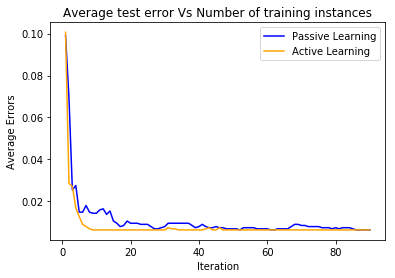

In [64]:
#ref:https://github.com/ashwinigiri/Classification-using-SVM---Banknote-Authentication-and-MFCCs-dataset-UCI-repository-/blob/master/SVM.ipynb
average_error[:] = [err/50 for err in average_error]
average_error_active[:] = [err_act/50 for err_act in average_error_active]
itr= np.arange(1,91,1)

fig,ax = plt.subplots()
ax.plot(itr,average_error,label='Passive Learning',color='blue')
ax.plot(itr,average_error_active,label='Active Learning',color='orange')
ax.set(xlabel='Iteration',ylabel='Average Errors',title='Average test error Vs Number of training instances')
legend = ax.legend()
plt.show()
